# WORK IN PROGRESS!!!
**This notebook is not ready** but if you wan't to look at the mess below, then go ahead.

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
%matplotlib inline
import os
import matplotlib.pyplot as plt
from numpy import arange
import wikipedia
from matplotlib.patches import ConnectionPatch
from matplotlib.patches import Rectangle
from collections import Counter

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold

# 1.1. Initial dataset inspection

In [3]:
cols = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 
        'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 
        'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
df = pd.read_csv('imports-85.data', names=cols)
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [5]:
df.describe(include='all')

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


# Initial observations:
* we're managing a fairly small dataset - we should try to avoid removing rows
* we can see missing values replaced with '?' sign
* some columns which seem numeric are not numeric at all - this is probably due to storing missing values as '?'

# 1.2. Data cleaning 

**We have some missing values - instead of applying 1 method to a single dataframe, we'll create 6 different dataframes:**
* numeric_a - we'll drop rows without the price value, and fill the remaining empty cells with avg values for their columns
* numeric_b - in this df we'll drop empty rows from columns:  'bore', 'stroke', 'horsepower', 'peak_rpm', 'price', the remaining empty cells will be  filled with avg values for their columns
* numeric_c - we'll drop empty rows from columns:  'bore', 'stroke', 'horsepower', 'peak_rpm', then **we'll take special care filling in the missing values in price column**, the remaining empty cells(normalized losses) will be  filled with avg values for their columns

We'll also create normalized versions of the above dataframes: numeric_a_n, numeric_b_n, numeric_c_n

In [6]:
numeric_cols = ['normalized_losses', 'price', 'bore', 'stroke', 'horsepower', 'peak_rpm',]
df[numeric_cols] = np.where(df[numeric_cols] == '?', '', df[numeric_cols])

In [7]:
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

In [8]:
df[df.columns[df.isna().any()]].isna().sum()

normalized_losses    41
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

In [9]:
numeric = df.loc[:, df.dtypes != object].copy()

numeric_a = numeric.dropna(subset = ['price']).copy()
numeric_a = numeric_a.fillna(numeric.mean())
numeric_b = numeric.dropna(subset = [ 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']).copy()
numeric_b = numeric_b.fillna(numeric_b.mean())

# 1.3. numeric_c 

In [10]:
corr_df = numeric_a.corr()['price'].to_frame().merge(numeric_b.corr()['price'], 
                                           left_index=True, right_index=True, suffixes=['_A_corr', '_B_corr'])
corr_df.sort_values('price_A_corr')

,price_A_corr,price_B_corr
highway_mpg,-0.704692,-0.715590
city_mpg,-0.686571,-0.702685
peak_rpm,-0.101616,-0.104333
symboling,-0.082391,-0.084118
compression_rate,0.071107,0.069500
stroke,0.082269,0.093746
normalized_losses,0.133999,0.131736
height,0.135486,0.138291
bore,0.543155,0.546873
wheel_base,0.584642,0.585793


**How to fill in the missing price values for numeric_c?**

In numeric a and b dataframes we've filled in the missing values, using the mean value for the column. Very simplistic aproach that we're going to modify and upgrade for the dataframe numeric_c.
Our plan assumed being very thorough in filling in the missing price values in the last dataframe, that's why we've created a corelation dataframe for the 'price' column.
* in both dataframes the column with the highest corelation value with 'price' column is 'engine_size'
* we'll group the dataframe by engine_size - to increase precision we'll group the data into 20 bins
    * then we'll calculate average price value for every engine_size bin 
    * we'll assing the missing price values based on their engine_size
* **prediction:** the 'engine_size' column will most likely be the best column for predicting the price value

In [11]:
numeric_c = numeric.dropna(subset = [ 'bore', 'stroke', 'horsepower', 'peak_rpm']).copy()

In [12]:
numeric_c[numeric_c['price'].isnull()]

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,NaN,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,94.5,155.9,63.6,52.0,1909,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,98.4,175.7,72.3,50.5,3366,203,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [13]:
bins = numeric_c['engine_size'].value_counts(bins=20).index
numeric_c.groupby(pd.cut(numeric_c.engine_size, bins=bins))['price'].mean()

engine_size
(87.5, 100.75]      7265.948276
(100.75, 114.0]     9754.628571
(114.0, 127.25]    11619.034483
(140.5, 153.75]    15516.047619
(127.25, 140.5]    17510.142857
(180.25, 193.5]    21027.000000
(153.75, 167.0]    16678.333333
(193.5, 206.75]    34528.000000
(167.0, 180.25]    17432.750000
(206.75, 220.0]    36318.333333
(233.25, 246.5]    34620.000000
(299.5, 312.75]    43180.000000
(246.5, 259.75]    33900.000000
(60.734, 74.25]     5151.000000
(74.25, 87.5]       5399.000000
(312.75, 326.0]    36000.000000
(220.0, 233.25]             NaN
(259.75, 273.0]             NaN
(273.0, 286.25]             NaN
(286.25, 299.5]             NaN
Name: price, dtype: float64

In [14]:
numeric_c[numeric_c['price'].isnull()]

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,NaN,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,94.5,155.9,63.6,52.0,1909,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,98.4,175.7,72.3,50.5,3366,203,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [15]:
numeric_c.loc[9,'price'] = 16520.750000
numeric_c.loc[44,'price'] = 7265.948276
numeric_c.loc[45,'price'] = 7265.948276
numeric_c.loc[129,'price'] = 34528.000000

In [16]:
numeric_c[numeric_c.columns[numeric_c.isna().any()]].isna().sum()

normalized_losses    39
dtype: int64

In [17]:
numeric_c = numeric_c.fillna(numeric_c.mean())

In [18]:
def spines(ax):
    x1 = ax.spines['right'].set_visible(False)
    x2 = ax.spines['top'].set_visible(False)
    x3 = ax.spines['left'].set_linewidth(2)
    x4 = ax.spines['bottom'].set_linewidth(2)
    return x1, x2, x3, x4

def spines2():
    x1 = ax.spines['right'].set_visible(False)
    x2 = ax.spines['top'].set_visible(False)
    x3 = ax.spines['left'].set_linewidth(3)
    x4 = ax.spines['bottom'].set_linewidth(3)
    return x1, x2, x3, x4

In [20]:
price_col = numeric_a['price']
numeric_a_n = (numeric_a - numeric_a.min())/(numeric_a.max() - numeric_a.min()).copy()
numeric_a_n['price'] = price_col

price_col = numeric_b['price']
numeric_b_n = (numeric_b - numeric_b.min())/(numeric_b.max() - numeric_b.min()).copy()
numeric_b_n['price'] = price_col

price_col = numeric_c['price']
numeric_c_n = (numeric_c - numeric_c.min())/(numeric_c.max() - numeric_c.min()).copy()
numeric_c_n['price'] = price_col

# 2. Selecting best column for a single column model

# 2.1. Univariate k-nearest neighbors model 
* we'll use the model on every column of our basic 3 dataframes

In [21]:
def knn_train_test(df, feature_col, target_col):
    # randomize
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))
    # split
    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()
    # train and predict
    knn = KNeighborsRegressor()
    knn.fit(train_set[[feature_col]], train_set[target_col])
    predictions = knn.predict(test_set[[feature_col]])
    rmse = np.sqrt(mean_squared_error(test_set[target_col], predictions))

    return rmse

In [1036]:
all_features = numeric.columns.tolist()
all_features.remove('price')

def fill_dict(model):
    rmse_dict_a = {}
    rmse_dict_b = {}
    rmse_dict_c = {}
    for col in all_features:
        rmse_dict_a[col] = model(numeric_a, col, 'price')
    for col in all_features:
        rmse_dict_b[col] = model(numeric_b, col, 'price')
    for col in all_features:
        rmse_dict_c[col] = model(numeric_c, col, 'price')
    return rmse_dict_a, rmse_dict_b, rmse_dict_c

rmse_dict_a, rmse_dict_b, rmse_dict_c = fill_dict(knn_train_test)

rmse_dict_a= dict(sorted(rmse_dict_a.items(), key=lambda item: item[1]))
rmse_dict_b = dict(sorted(rmse_dict_b.items(), key=lambda item: item[1]))
rmse_dict_c = dict(sorted(rmse_dict_c.items(), key=lambda item: item[1]))

results_a = pd.DataFrame.from_dict(rmse_dict_a, orient='index')
results_b = pd.DataFrame.from_dict(rmse_dict_b, orient='index')
results_c = pd.DataFrame.from_dict(rmse_dict_c, orient='index')

results_frame = results_a.merge(results_b, left_index=True, right_index=True, suffixes=['_numeric_A', '_numeric_B'])
results_frame2 = results_frame.merge(results_c, left_index=True, right_index=True)
results_frame2 = results_frame2.rename(columns={results_frame2.columns[0]: 'numeric_a', results_frame2.columns[1]: 'numeric_b', 
                              results_frame2.columns[2]: 'numeric_c'
                              })
results_frame2

,numeric_a,numeric_b,numeric_c
engine_size,3271.449938,4206.269209,3014.293169
horsepower,4064.464572,4543.317619,4441.723870
curb_weight,4445.141920,4594.629028,3667.924168
highway_mpg,4643.046278,4368.230464,4139.949639
city_mpg,4760.449842,4440.237523,4717.122297
width,4772.459149,5038.643838,4290.488430
length,5428.810101,5212.513611,6186.265681
wheel_base,5460.851458,5692.794469,6121.214509
compression_rate,6610.812153,7020.882648,6210.718457
bore,6778.637424,7225.667155,7590.625100


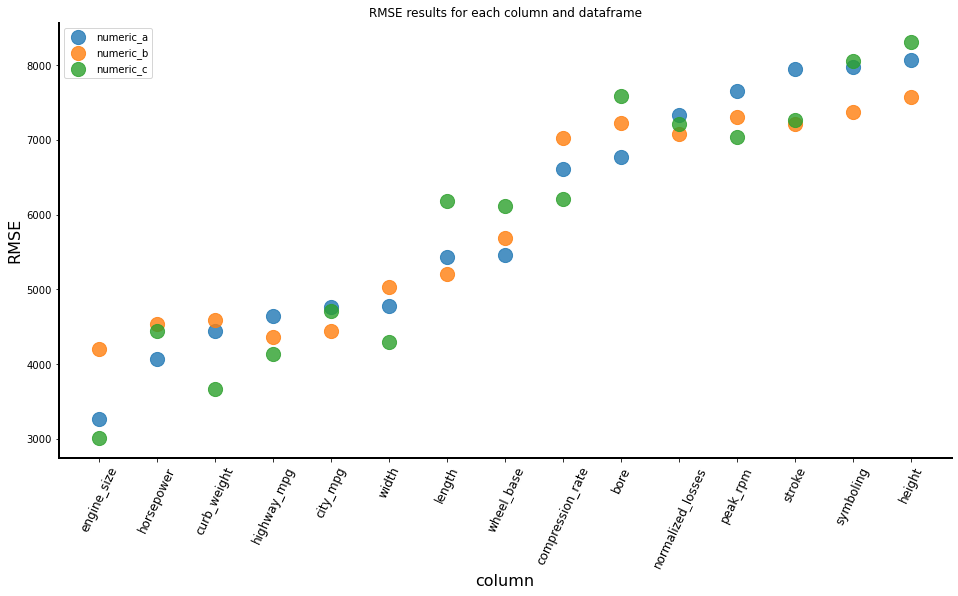

In [24]:
fig, ax = plt.subplots(figsize=(16,8))
plt.scatter( x=results_frame2.index, y=results_frame2['numeric_a'] ,label='numeric_a', s=200, alpha=0.8)
plt.scatter( x=results_frame2.index, y=results_frame2['numeric_b'] ,label='numeric_b', s=200, alpha=0.8)
plt.scatter( x=results_frame2.index, y=results_frame2['numeric_c'] ,label='numeric_c', s=200, alpha=0.8)
spines(ax)
ax.tick_params(axis = 'x',labelsize=12, rotation=65)
plt.legend(loc=2)
plt.xlabel('column', size=16)
plt.ylabel('RMSE',  size=16)
plt.title('RMSE results for each column and dataframe')
plt.show()


# Observations:
* taking extra care with filling in missing price values in dataframe 'numeric_c' paid of
* as expected 'engine_size' column delivers the best results (lowest rmse)
* big difference between numeric a and b is looks odd, we'll try a different arrangement of indexes:

# 2.2. Introducing random seed into the model

In [29]:
# create a function with a random seed input
def knn_train_test_v2(df, feature_col, target_col, n):
    
    # randomize 
    np.random.seed(n)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))
    # split
    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()
    
    # train and test 
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(train_set[[feature_col]], train_set[target_col])
    predictions = knn.predict(test_set[[feature_col]])
    rmse = np.sqrt(mean_squared_error(test_set[target_col], predictions))

    return rmse

In [30]:
df_list = [numeric_a, numeric_b, numeric_c]
results = []
def df_seed_check(df_list, col_name,n):
    best_results = []
    for df in df_list:
        seed_dictionary = {}
        for i in list(range(0,n)):
            seed_dictionary[i] = knn_train_test_v2(df,col_name, 'price', i)
            results.append(seed_dictionary[i])            
        best_results.append(min(seed_dictionary.items(), key=lambda x: x[1]))   
    return best_results

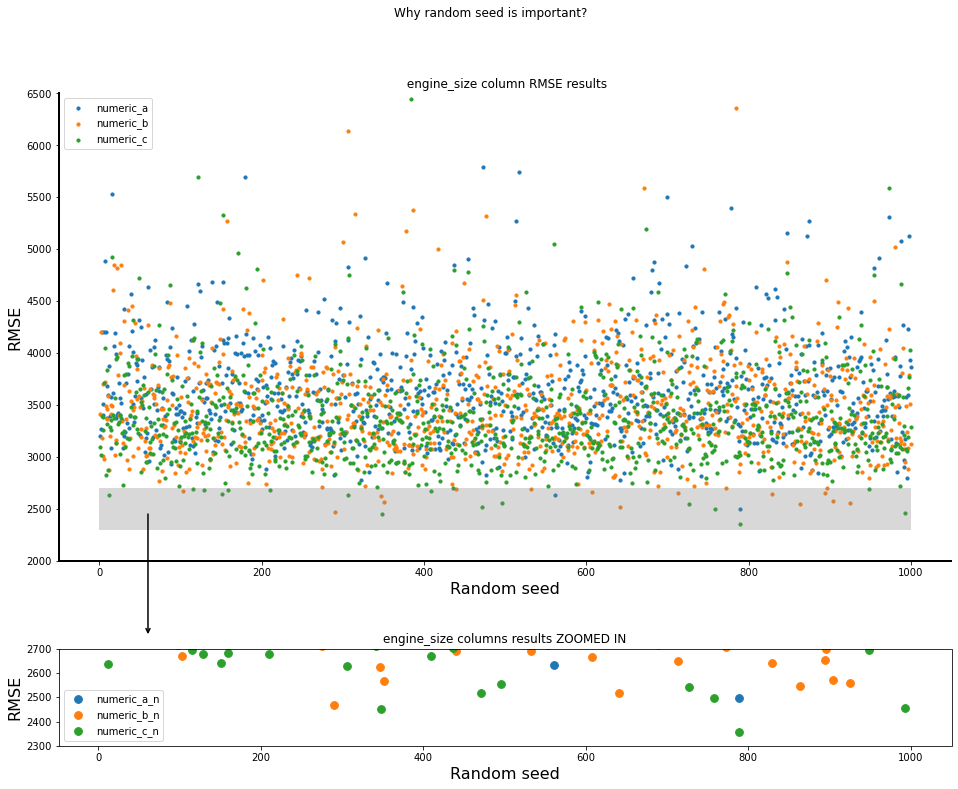

In [200]:
results = []
df_seed_check(df_list,'engine_size',1000)
num_a_results = results[:1000].copy()
num_b_results = results[1000:2000].copy()
num_c_results = results[2000:].copy()

fig, ax = plt.subplots(figsize=(16,12))
fig.suptitle('Why random seed is important?')

grid = plt.GridSpec(8, 1, wspace=0, hspace=19.3)
ax1 = plt.subplot(grid[0:6, 0])
plt.scatter( x=list(range(1,1001)), y=num_a_results ,label='numeric_a', s=10)
plt.scatter( x=list(range(1,1001)), y=num_b_results ,label='numeric_b', s=10)
plt.scatter( x=list(range(1,1001)), y=num_c_results ,label='numeric_c', s=10)

plt.legend()
plt.title(' engine_size column RMSE results')
plt.xlabel('Random seed', size=16)
plt.ylabel('RMSE',  size=16)

ax1.add_patch(Rectangle((0, 2300), 1000, 400, alpha=0.3, facecolor = 'grey'))
plt.legend(loc=2)

plt.ylim(2000,6500)
plt.arrow(2,-3000, 10,500)

ax2 = plt.subplot(grid[6:, 0])
plt.scatter( x=list(range(1,1001)), y=num_a_results ,label='numeric_a_n', s=60)
plt.scatter( x=list(range(1,1001)), y=num_b_results ,label='numeric_b_n', s=60)
plt.scatter( x=list(range(1,1001)), y=num_c_results ,label='numeric_c_n', s=60)

plt.legend()
plt.title('engine_size columns results ZOOMED IN')
plt.xlabel('Random seed', size=16)
plt.ylabel('RMSE',  size=16)
spines(ax1)
ax.tick_params(labelsize=12)
plt.ylim(2300,2700)
plt.legend(loc=3)


con = ConnectionPatch(
    xyA=(0.1, 0.1), coordsA=ax1.transAxes,
    xyB=(0.1, 2759.7), coordsB=ax2.get_yaxis_transform(),
    arrowstyle="->", linewidth=1.5)
ax2.add_artist(con)
plt.show()

# that shows how important random seed is

# best results

# 2.3. Using our model on normalized dataframes

# 2.4. Comparing results of normalized and non normalized dataframes:

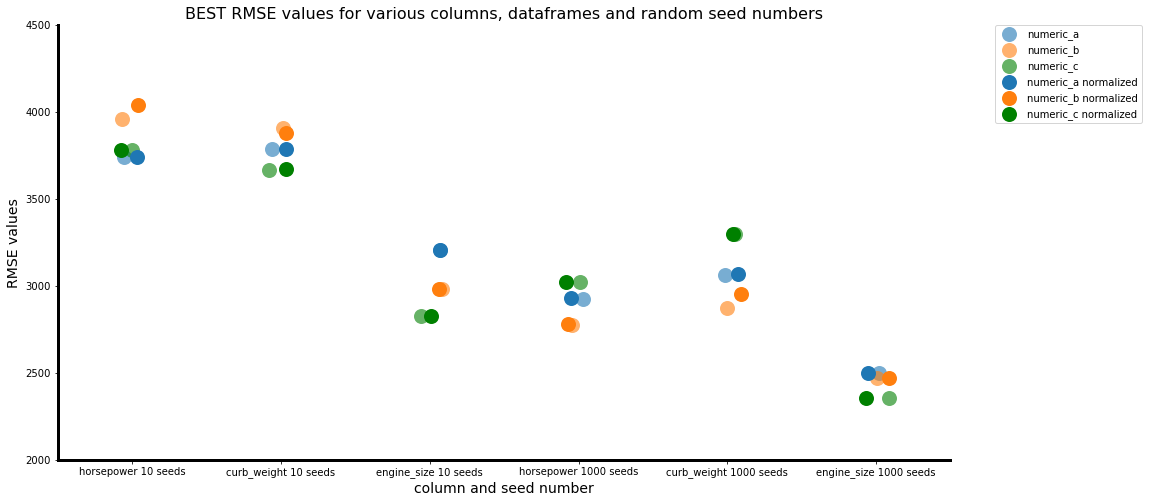

In [424]:
# create a function for generating dataframe:
def create_df(seed_function, df_list, suffix=''):
    a_df_to_return = pd.DataFrame([seed_function(df_list,'horsepower',10),
            seed_function(df_list,'curb_weight',10),
            seed_function(df_list,'engine_size',10),
            seed_function(df_list,'horsepower',1000),
            seed_function(df_list,'curb_weight',1000), 
            seed_function(df_list,'engine_size',1000)
             ], 
             columns=('numeric_a'+suffix,'numeric_b'+suffix,'numeric_c'+suffix), index=('horsepower 10 seeds',
                                                                   'curb_weight 10 seeds',
                                                                   'engine_size 10 seeds',
                                                                  'horsepower 1000 seeds',
                                                                  'curb_weight 1000 seeds',
                                                                   'engine_size 1000 seeds'
                                                                  ))
    return a_df_to_return

# create df for best results for non normalized dfs:
nums = create_df(df_seed_check,df_list)
# create df for best results for normalized dfs:
nums_n = create_df(df_seed_check, df_n_list, '_n')

# plot it:
fig, ax = plt.subplots(figsize=(16,8))
sns.stripplot( x=nums.index, y=nums[nums.columns[0]].str[1], s=15, color='#1f77b4',  alpha=0.6, label='numeric_a')
sns.stripplot( x=nums.index, y=nums[nums.columns[1]].str[1], s=15, color='#ff7f0e', alpha=0.6, label='numeric_b')
sns.stripplot( x=nums.index, y=nums[nums.columns[2]].str[1], s=15, color='green', alpha=0.6, label='numeric_c')
sns.stripplot( x=nums_n.index, y=nums_n[nums_n.columns[0]].str[1], s=15, color='#1f77b4', label='numeric_a normalized')
sns.stripplot( x=nums_n.index, y=nums_n[nums_n.columns[1]].str[1], s=15, color='#ff7f0e', label='numeric_b normalized')
sns.stripplot( x=nums_n.index, y=nums_n[nums_n.columns[2]].str[1], s=15, color='green', label='numeric_c normalized')
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[::6], labels[::6], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
spines2()
plt.title('BEST RMSE values for various columns, dataframes and random seed numbers', size=16)
plt.xlabel('column and seed number', size=14)
plt.ylabel('RMSE values', size=14)
plt.ylim(2000,4500)
plt.show()

In [512]:
nums_best_results = nums.merge(nums_n, left_index=True, right_index=True)
nums_best_results['best df'] = nums_best_results.apply(lambda x: x.str[1]).idxmin(axis=1)
nums_best_results['best result'] = nums_best_results.loc[:,:'numeric_c_n'].apply(lambda x: x.str[1]).min(axis=1)
nums_best_results

,numeric_a,numeric_b,numeric_c,numeric_a_n,numeric_b_n,numeric_c_n,best df,best result
horsepower 10 seeds,"(3, 3741.7302132188593)","(7, 3958.9520200607203)","(3, 3782.1773239485788)","(3, 3742.705969093633)","(2, 4041.084857474057)","(3, 3781.715959480673)",numeric_a,3741.730213
curb_weight 10 seeds,"(0, 3787.561329791334)","(3, 3909.7204880520394)","(1, 3667.9241682927845)","(0, 3787.561329791334)","(3, 3877.064333871646)","(1, 3670.613515796278)",numeric_c,3667.924168
engine_size 10 seeds,"(0, 3205.3630293773294)","(5, 2981.0871157745014)","(7, 2827.3963605665767)","(0, 3205.3630293773294)","(5, 2981.0871157745014)","(7, 2827.3963605665767)",numeric_c,2827.396361
horsepower 1000 seeds,"(882, 2927.69420919847)","(128, 2773.6407302331286)","(251, 3022.0747740540983)","(882, 2928.8650521089817)","(128, 2782.8585137133614)","(251, 3021.649260259856)",numeric_b,2773.640730
curb_weight 1000 seeds,"(982, 3065.7514839895553)","(426, 2871.5644242205294)","(252, 3296.6267655401803)","(982, 3065.879225176089)","(426, 2951.4589936891502)","(252, 3296.6267655401803)",numeric_b,2871.564424
engine_size 1000 seeds,"(788, 2497.602611218277)","(289, 2469.6304606650965)","(788, 2357.8562423336266)","(788, 2497.602611218277)","(289, 2469.6304606650965)","(788, 2353.2063175828102)",numeric_c_n,2353.206318


In [426]:
results = []
def df_seed_check_avg(df_list, col_name,n):
    avg_results = []
    for df in df_list:
        seed_dictionary = {}
        for i in list(range(0,n)):
            seed_dictionary[i] = knn_train_test_v2(df,col_name, 'price', i)
            results.append(seed_dictionary[i])            
        avg_results.append(sum(seed_dictionary.values()) / len(seed_dictionary))   
    return avg_results

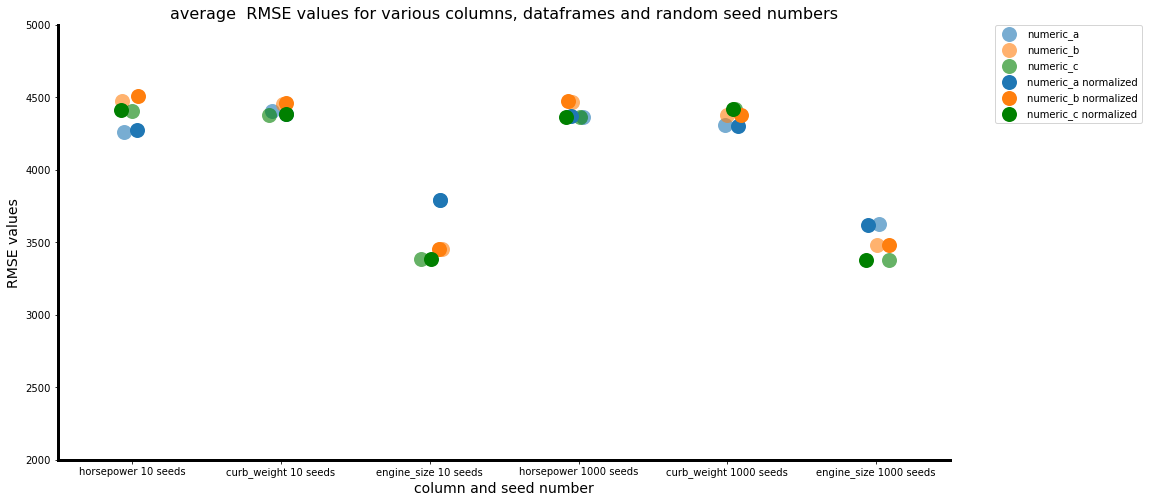

In [508]:
# repeat the process for average results:

#creating dataframes:
nums_avg = create_df(df_seed_check_avg, df_list)
nums_avg_n = create_df(df_seed_check_avg, df_n_list, '_n')
average_res = nums_avg.merge(nums_avg_n, left_index=True, right_index=True)

# ploting them
fig, ax = plt.subplots(figsize=(16,8))
sns.stripplot( x=average_res.index, y=average_res[average_res.columns[0]], s=15, color='#1f77b4',  alpha=0.6, label='numeric_a')
sns.stripplot( x=average_res.index, y=average_res[average_res.columns[1]], s=15, color='#ff7f0e', alpha=0.6, label='numeric_b')
sns.stripplot( x=average_res.index, y=average_res[average_res.columns[2]], s=15, color='green', alpha=0.6, label='numeric_c')
sns.stripplot( x=average_res.index, y=average_res[average_res.columns[3]], s=15, color='#1f77b4', label='numeric_a normalized')
sns.stripplot( x=average_res.index, y=average_res[average_res.columns[4]], s=15, color='#ff7f0e', label='numeric_b normalized')
sns.stripplot( x=average_res.index, y=average_res[average_res.columns[5]], s=15, color='green', label='numeric_c normalized')
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[::6], labels[::6], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
spines2()
plt.title('average  RMSE values for various columns, dataframes and random seed numbers', size=16)
plt.xlabel('column and seed number', size=14)
plt.ylabel('RMSE values', size=14)
plt.ylim(2000,5000)
plt.show()

In [515]:
average_res['best df'] = average_res.idxmin(axis=1)
average_res['best average result'] = average_res.loc[:,:'numeric_c_n'].min(axis=1)
average_res

,numeric_a,numeric_b,numeric_c,numeric_a_n,numeric_b_n,numeric_c_n,best df,best result
horsepower 10 seeds,4263.685187,4476.650636,4406.542867,4276.970108,4508.328129,4410.930773,numeric_a,4263.685187
curb_weight 10 seeds,4404.723766,4455.792589,4379.333503,4388.165347,4459.248656,4385.193208,numeric_c,4379.333503
engine_size 10 seeds,3794.273265,3452.006711,3389.011841,3789.545450,3457.917734,3388.791786,numeric_c_n,3388.791786
horsepower 1000 seeds,4367.888171,4469.855890,4362.497780,4375.149932,4478.769727,4362.170484,numeric_c_n,4362.170484
curb_weight 1000 seeds,4306.967177,4379.418233,4423.248003,4305.283774,4376.012539,4420.020335,numeric_a_n,4305.283774
engine_size 1000 seeds,3626.998882,3480.439640,3377.467030,3622.295660,3480.975338,3377.789533,numeric_c,3377.467030


# Observations:
* **testing out various random seed numbers can drastically improve our results**
* 'engine_size' column delivers the best results
    * numeric_c_n dataframe gives us the best results in our model for 'engine_size' column
* it's worth noting that numeric_c_n is the best dataframe for a model based on single column: 'engine_size'
    * other columns can have better results on different dataframes - something to remember, when we'll be improving our model by adding more training columns
* a very important findig is that we have a clear winner for the best columns, but results for the second place can vary
    * **we'll need to remember that when selecting columns for a multiple-column model**
* normalizing the dataframe gives us a very small advantage on 'engine_size' column
    * in some cases the normalized dataframes didn't perform as well as the dataframes that haven't been normalized

# 3. modyfing the k value
For the time being lets set the random seed number to 788 (the best we found in previous steps), and focus on k value.
We'll run our model using various columns and 3 different dataframes(numeric_a_n, numeric_b_n and numeric_c_n) and 5 different k values (1, 3, 5, 7 and 9).
* the results we'll be saved to a dataframe with columns(or rows) named after the dataframe and k value 
    * eg. numeric_a_n_k3 is a series named after results of the model for dataframe 'numeric_a_n' k value '3'

# 3.1. Update the model: include various k-values 

In [48]:
def knn_train_test_v3(df, feature_col, target_col):
    
    # randomize 
    np.random.seed(788)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))
    # split
    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()
    k_list = [1, 3, 5, 7, 9]
    rmse_dict = {}   
    for k in k_list:
    # train and test 
        
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[[feature_col]], train_set[target_col])
        predictions = knn.predict(test_set[[feature_col]])
        rmse = np.sqrt(mean_squared_error(test_set[target_col], predictions))
        rmse_dict[k] = rmse

    return rmse_dict

# 3.2. Generate a dataframe consisting of results for 3 different dataframes, all their columns and 5 different k-values
Remember that for now, the random seed value stays the same.

In [1055]:
all_features = numeric.columns.tolist()
all_features.remove('price')

# setup renaming columns:
k_list = [1, 3, 5, 7, 9]
df_names = ['numeric_a_n', 'numeric_b_n', 'numeric_c_n']
col_names = []
for df in df_names:
    for k in k_list:
        col_names.append(df+'_k'+str(k))

        
rmse_dict_a, rmse_dict_b, rmse_dict_c = fill_dict(knn_train_test_v3)        
def fill_3_frames():  
    
    results_a = pd.DataFrame.from_dict(rmse_dict_a, orient='index')
    for n in range(len(results_a.columns)):
        results_a = results_a.rename(columns= {results_a.columns[n]: col_names[n]}) 
    results_b = pd.DataFrame.from_dict(rmse_dict_b, orient='index')
    for i in range(5,(len(results_b.columns)+5)):
        results_b = results_b.rename(columns= {results_b.columns[i-5]: col_names[i]}) 
    results_c = pd.DataFrame.from_dict(rmse_dict_c, orient='index')
    for i in range(10,(len(results_c.columns)+10)):
        results_c = results_c.rename(columns= {results_c.columns[i-10]: col_names[i]}) 
    return results_a, results_b, results_c

results_a, results_b, results_c = fill_3_frames()

results_frame = results_a.merge(results_b, left_index=True, right_index=True)
results_frame2 = results_frame.merge(results_c, left_index=True, right_index=True)
cols = ['numeric_a_n_k1', 'numeric_b_n_k1','numeric_c_n_k1', 'numeric_a_n_k3', 'numeric_b_n_k3', 'numeric_c_n_k3',
        'numeric_a_n_k5', 'numeric_b_n_k5','numeric_c_n_k5','numeric_a_n_k7','numeric_b_n_k7','numeric_c_n_k7',
        'numeric_a_n_k9', 'numeric_b_n_k9','numeric_c_n_k9']
results_frame2 = results_frame2.sort_values('numeric_c_n_k5')
results_frame3 = results_frame2[cols]

In [1056]:
plota = results_frame2.loc[:,:'numeric_a_n_k9']

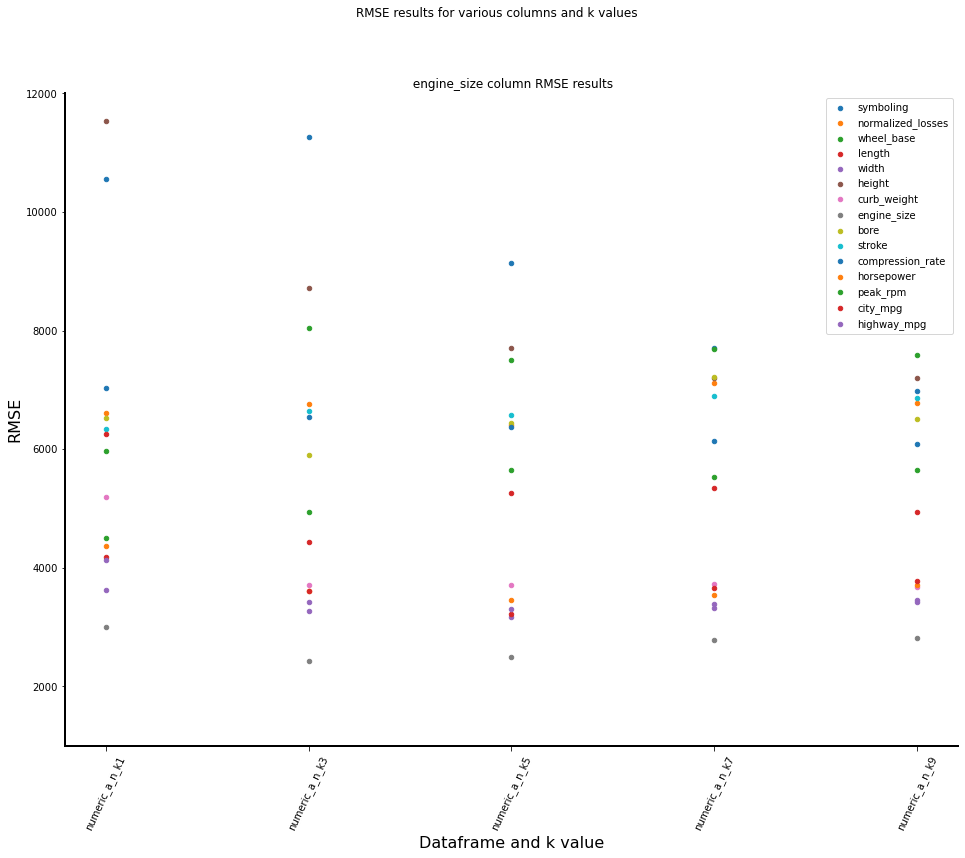

In [1057]:

fig, ax = plt.subplots(figsize=(16,12))
fig.suptitle('RMSE results for various columns and k values')

# grid = plt.GridSpec(8, 1, wspace=0, hspace=19.3)
# ax1 = plt.subplot(grid[0:6, 0])
for col in all_features:
#     plt.plot(plota.columns, plota.loc[col], label=col)
    plt.scatter( x=plota.columns, y=plota.loc[col] , s=20, label=col)

ax.tick_params(axis='x',length=5, rotation=65)
plt.legend()
plt.title(' engine_size column RMSE results')
plt.xlabel('Dataframe and k value', size=16)
plt.ylabel('RMSE',  size=16)
spines(ax)
plt.ylim(1000,12000)
plt.show()

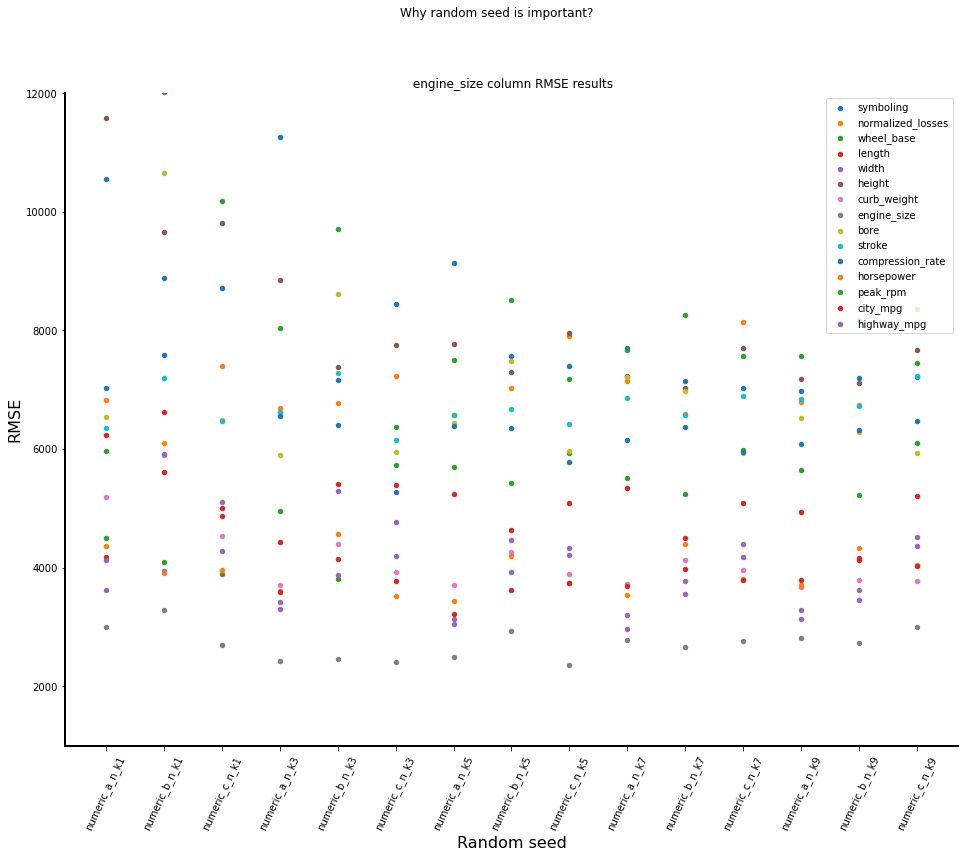

In [556]:

fig, ax = plt.subplots(figsize=(16,12))
fig.suptitle('Why random seed is important?')

# grid = plt.GridSpec(8, 1, wspace=0, hspace=19.3)
# ax1 = plt.subplot(grid[0:6, 0])
for col in all_features:
#     plt.plot(results_frame2.columns, results_frame2.loc[col], label=col)
    plt.scatter( x=results_frame3.columns, y=results_frame3.loc[col] , s=20, label=col)

ax.tick_params(axis='x',length=5, rotation=65)
plt.legend()
plt.title(' engine_size column RMSE results')
plt.xlabel('Dataframe and k-value', size=16)
plt.ylabel('RMSE',  size=16)
spines(ax)
plt.ylim(1000,12000)
plt.show()

In [557]:
results_frame3 =  results_frame2.copy()
results_frame3['best result'] = results_frame2.idxmin(axis=1)
results_frame3

,numeric_a_n_k1,numeric_a_n_k3,numeric_a_n_k5,numeric_a_n_k7,numeric_a_n_k9,numeric_b_n_k1,numeric_b_n_k3,numeric_b_n_k5,numeric_b_n_k7,numeric_b_n_k9,numeric_c_n_k1,numeric_c_n_k3,numeric_c_n_k5,numeric_c_n_k7,numeric_c_n_k9,best result
engine_size,2993.611979,2420.576413,2497.602611,2781.943187,2806.019104,3277.146902,2461.686799,2928.943843,2656.232786,2729.280876,2693.041898,2408.662738,2353.206318,2765.514027,3005.716816,numeric_c_n_k5
horsepower,4367.022744,3606.376943,3436.536768,3538.991272,3708.647150,3915.785359,4573.288779,4189.883202,4393.461463,4327.505351,3952.924513,3522.068718,3740.335519,3813.920977,4051.082574,numeric_a_n_k5
city_mpg,6232.013175,3594.930129,3216.309003,3696.175130,3797.094260,6624.458183,4142.042354,3628.061924,3984.474033,4161.900824,5007.742167,3780.077242,3744.974559,3793.477973,4019.250233,numeric_a_n_k5
curb_weight,5189.272676,3701.758307,3711.471033,3722.399033,3669.062666,5893.477270,4406.259213,4269.753672,4120.374385,3798.835472,4531.735536,3932.259907,3890.354246,3961.053369,3775.880792,numeric_a_n_k9
highway_mpg,3629.864612,3300.191205,3056.495436,2970.703260,3131.563399,5913.485865,5293.909673,4458.836800,3770.911305,3622.307274,5101.116012,4767.126367,4215.026412,4173.685949,4358.155450,numeric_a_n_k7
width,4124.807424,3425.909636,3127.931827,3194.559820,3280.133327,3945.691722,3880.738131,3924.483420,3559.970342,3447.442624,4279.114585,4193.853006,4324.021786,4390.805737,4511.944398,numeric_a_n_k5
length,4177.073283,4424.271077,5248.787424,5348.244491,4935.329760,5612.168989,5411.432825,4642.182450,4491.043914,4132.795706,4870.269269,5401.313651,5097.049296,5082.216636,5205.273251,numeric_b_n_k9
compression_rate,7026.349602,6549.396763,6380.420152,6144.050586,6085.429332,7587.921436,6409.503176,6359.264612,6370.823113,6317.182224,8709.734365,5280.541025,5777.206957,5953.312704,6467.846941,numeric_c_n_k3
wheel_base,4507.039788,4958.900500,5692.399245,5518.370755,5650.010375,4102.025336,3807.512273,5420.347821,5239.365461,5224.027154,3890.949095,5730.080848,5928.061398,5981.879923,6107.644102,numeric_b_n_k3
bore,6532.244670,5903.756404,6433.337847,7210.441640,6515.604834,10662.527910,8622.032236,7476.193227,6978.116219,6282.645610,6480.936018,5944.641569,5965.864590,5925.297530,5927.482422,numeric_a_n_k3


In [ ]:
results_frame3['best result'].value_counts()

# Observations:
* overall the best result is still numeric_c_n with k value = 5 (rmse = 2353.206318), that comes with no surprise 
* the interesting discovery is that the mentioned dataframe and k value (numeric_c_n_k5) can't be seen anywhere else in top results for other columns!
    * this may lead to an interesting conclusion: numeric_c_n may be not the best dataframe for multiple column models, which will build in the future
* numeric_a_n_k5 occurs frequently in the best columns - it may become our best candidate for multiple column models


# remember that numeric_c_n was the best df for single column model?
We're about to start trying multiple column models, but before we do:
lets check how dataframes perform when we're not interested in the single best result of rmse - we're more interested in the best 2,3,4 or 5 results>

# 3.3. For every dataframe - k-value option: create an average result of best 2, 3, 4 and 5 columns

# 3.4 Check which dataframe and k-value delivers best result for 2 columns, 3 columns, 4 and 5, also display the best result

In [558]:
results_t_all = results_frame2.transpose()
# results_t_all['min'] = results_t_all.min(axis=1)
results_t_all['2 cols avg'] = results_t_all.loc[:,:'highway_mpg'].apply(lambda x: x.sort_values().unique()[0:2].mean(), axis=1)
results_t_all['3 cols avg'] = results_t_all.loc[:,:'highway_mpg'].apply(lambda x: x.sort_values().unique()[0:3].mean(), axis=1)
results_t_all['4 cols avg'] = results_t_all.loc[:,:'highway_mpg'].apply(lambda x: x.sort_values().unique()[0:4].mean(), axis=1)
results_t_all['5 cols avg'] = results_t_all.loc[:,:'highway_mpg'].apply(lambda x: x.sort_values().unique()[0:5].mean(), axis=1)
results_t_all
### split here
dfs_for_many_cols = results_t_all.loc[:,'2 cols avg':].transpose().copy()
dfs_for_many_cols['Min score df'] = dfs_for_many_cols.idxmin(axis=1)
dfs_for_many_cols['Min score'] = dfs_for_many_cols.loc[:,:'numeric_c_n_k9'].min(axis=1)
dfs_for_many_cols

,numeric_a_n_k1,numeric_a_n_k3,numeric_a_n_k5,numeric_a_n_k7,numeric_a_n_k9,numeric_b_n_k1,numeric_b_n_k3,numeric_b_n_k5,numeric_b_n_k7,numeric_b_n_k9,numeric_c_n_k1,numeric_c_n_k3,numeric_c_n_k5,numeric_c_n_k7,numeric_c_n_k9,Min score df,Min score
2 cols avg,3311.738296,2860.383809,2777.049024,2876.323224,2968.791252,3596.466131,3301.864577,3278.502884,3213.572045,3175.794075,3322.983206,2965.365728,3046.770918,3279.496000,3390.798804,numeric_a_n_k5,2777.049024
3 cols avg,3663.499778,3105.232582,2923.469017,3097.212573,3202.215056,4362.136510,3669.996122,3582.296323,3470.539375,3383.474541,3725.900649,3236.936233,3279.505465,3457.637659,3600.282613,numeric_a_n_k5,2923.469017
4 cols avg,4044.943003,3230.518672,3051.735954,3246.953212,3328.823080,4749.973849,3895.819286,3754.160660,3632.998127,3578.081112,4046.361029,3410.767151,3432.217660,3583.491586,3712.982604,numeric_a_n_k5,3051.735954
5 cols avg,4482.357037,3324.766599,3183.682970,3342.042377,3422.477316,5124.870716,4175.437364,3895.095888,3785.090794,3727.965959,4257.312025,3682.038994,3588.779411,3701.530459,3842.017173,numeric_a_n_k5,3183.682970


# Now lets. repeat those steps a 1000 times

So we know that engine size is very often the best column but not always?(check random seed) we'd like to learn which 5 columns are the best most often!

In [1049]:
def knn_train_test_v4(df, feature_col, target_col, seed):
    
    # randomize 
    np.random.seed(seed)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))
    # split
    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()
    k_list = [1, 3, 5, 7, 9]
    rmse_dict = {}   
    for k in k_list:
    # train and test 
        
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[[feature_col]], train_set[target_col])
        predictions = knn.predict(test_set[[feature_col]])
        rmse = np.sqrt(mean_squared_error(test_set[target_col], predictions))
        rmse_dict[k] = rmse

    return rmse_dict

In [1100]:
seed_dict = {}

results_frame_sum = results_frame2.copy()
for col in results_frame_sum.columns:
    results_frame_sum[col].values[:] = 0

dict_of_all = {}
best_score_for2cols = 10000
best_score_for3cols = 10000
best_score_for4cols = 10000
best_score_for5cols = 10000
# !!! REMEMBER TO CHANGE THE NUMBER AT THE BOTTOM!
for x in range(0,100):
    all_features = numeric.columns.tolist()
    all_features.remove('price')

    # setup renaming columns:
    k_list = [1, 3, 5, 7, 9]
    df_names = ['numeric_a_n', 'numeric_b_n', 'numeric_c_n']
    col_names = []
    for df in df_names:
        for k in k_list:
            col_names.append(df+'_k'+str(k))
    
    rmse_dict_a = {}
    rmse_dict_b = {}
    rmse_dict_c = {}
    for col in all_features:
        rmse_dict_a[col] = knn_train_test_v4(numeric_a_n, col, 'price',x)
    for col in all_features:
        rmse_dict_b[col] = knn_train_test_v4(numeric_b_n, col, 'price',x)
    for col in all_features:
        rmse_dict_c[col] = knn_train_test_v4(numeric_c_n, col, 'price',x)
        
    results_a, results_b, results_c = fill_3_frames()

    results_frame = results_a.merge(results_b, left_index=True, right_index=True)
    results_frame2 = results_frame.merge(results_c, left_index=True, right_index=True)
    results_frame_sum += results_frame2

    results_t_all = results_frame2.transpose()
    results_t_all['2 cols avg'] = results_t_all.loc[:,:'highway_mpg'].apply(lambda x: x.sort_values().unique()[0:2].mean(), axis=1)
    results_t_all['3 cols avg'] = results_t_all.loc[:,:'highway_mpg'].apply(lambda x: x.sort_values().unique()[0:3].mean(), axis=1)
    results_t_all['4 cols avg'] = results_t_all.loc[:,:'highway_mpg'].apply(lambda x: x.sort_values().unique()[0:4].mean(), axis=1)
    results_t_all['5 cols avg'] = results_t_all.loc[:,:'highway_mpg'].apply(lambda x: x.sort_values().unique()[0:5].mean(), axis=1)

    dfs_for_many_cols = results_t_all.loc[:,'2 cols avg':].transpose().copy()
    dfs_for_many_cols['Min score df'] = dfs_for_many_cols.idxmin(axis=1)
    dfs_for_many_cols['Min score'] = dfs_for_many_cols.loc[:,:'numeric_c_n_k9'].min(axis=1)
    
    
    if dfs_for_many_cols.loc['2 cols avg','Min score'] < best_score_for2cols:
        best_score_for2cols = dfs_for_many_cols.loc['2 cols avg','Min score']
        best_seed_for_2cols = x
        best_df_for_2cols = dfs_for_many_cols.loc['2 cols avg','Min score df']
        best_2_cols = results_frame2[best_df_for_2cols].nsmallest(2)
    
    if dfs_for_many_cols.loc['3 cols avg','Min score'] < best_score_for3cols:
        best_score_for3cols = dfs_for_many_cols.loc['3 cols avg','Min score']
        best_seed_for_3cols = x
        best_df_for_3cols = dfs_for_many_cols.loc['3 cols avg','Min score df']
        best_3_cols = results_frame2[best_df_for_3cols].nsmallest(3)
        
    if dfs_for_many_cols.loc['4 cols avg','Min score'] < best_score_for4cols:
        best_score_for4cols = dfs_for_many_cols.loc['4 cols avg','Min score']
        best_seed_for_4cols = x
        best_df_for_4cols = dfs_for_many_cols.loc['4 cols avg','Min score df']
        best_4_cols = results_frame2[best_df_for_4cols].nsmallest(4)
        
    if dfs_for_many_cols.loc['5 cols avg','Min score'] < best_score_for5cols:
        best_score_for5cols = dfs_for_many_cols.loc['5 cols avg','Min score']
        best_seed_for_5cols = x
        best_df_for_5cols = dfs_for_many_cols.loc['5 cols avg','Min score df']
        best_5_cols = results_frame2[best_df_for_5cols].nsmallest(5)

# THIS NUMBER SHOULD EQUAL SEED TOP RANGE:
results_frame_sum = results_frame_sum/100
results_frame_sum['mean'] = results_frame_sum.mean(axis=1)
results_frame_sum['mean'].sort_values()

engine_size          3624.765041
horsepower           4499.955412
curb_weight          4694.486477
city_mpg             4710.221245
width                4792.970992
highway_mpg          4921.300629
length               5862.440186
wheel_base           6202.580655
compression_rate     7065.575308
bore                 7183.461782
normalized_losses    7841.217900
stroke               7905.870380
peak_rpm             8275.518858
height               8470.861344
symboling            8588.891498
Name: mean, dtype: float64

In [1104]:
results_frame_sum

,numeric_a_n_k1,numeric_a_n_k3,numeric_a_n_k5,numeric_a_n_k7,numeric_a_n_k9,numeric_b_n_k1,numeric_b_n_k3,numeric_b_n_k5,numeric_b_n_k7,numeric_b_n_k9,numeric_c_n_k1,numeric_c_n_k3,numeric_c_n_k5,numeric_c_n_k7,numeric_c_n_k9,mean
symboling,9999.741496,8427.549351,8032.631406,7853.519996,7750.385345,9997.301450,8495.688066,8168.425462,8010.764354,7914.032467,10694.188249,8832.507048,8430.365292,8168.863510,8057.408971,8588.891498
normalized_losses,8330.331323,7695.306359,7731.907951,7758.747944,7629.345712,8193.445584,7450.667270,7617.716027,7696.176943,7633.466129,8988.869462,7700.853608,7730.760962,7750.197466,7710.475757,7841.217900
wheel_base,5676.002012,6002.892496,6116.790305,6176.922169,6251.104810,5688.989056,6127.989239,6245.890648,6303.494469,6373.279351,6415.062094,6360.333002,6356.629090,6426.886066,6516.445016,6202.580655
length,6018.709493,5687.409257,5680.217038,5652.172190,5656.957840,6162.424921,5757.469080,5770.373884,5770.970461,5768.032006,6264.151149,5873.664467,5947.151196,5972.758660,5954.141142,5862.440186
width,4886.480620,4613.340750,4647.999496,4742.740634,4907.065244,5010.902985,4776.765288,4747.806227,4823.324125,4992.283613,4735.903963,4611.539005,4679.850873,4777.370973,4941.191078,4792.970992
height,9469.884570,8211.877814,7999.080564,7917.172166,7859.723992,9869.274525,8404.631839,8082.202130,8040.048844,8036.064606,9920.222030,8572.086096,8274.779079,8196.589870,8209.282031,8470.861344
curb_weight,5500.848598,4633.812307,4333.835797,4365.101695,4457.531771,5565.942051,4716.717007,4479.708402,4474.160466,4600.239107,5393.998345,4679.875639,4381.759039,4366.678212,4467.088716,4694.486477
engine_size,3688.899212,3473.886276,3646.149961,3813.625117,4032.410580,3538.727806,3362.639341,3503.280847,3784.756850,4022.782101,3451.552472,3175.172669,3411.582309,3611.739880,3854.270187,3624.765041
bore,7643.390645,6981.872832,6987.270265,6902.691780,6792.342389,8023.089211,7236.068612,7173.230212,7061.144579,6928.375600,7992.808642,7043.594745,7083.609386,7007.568581,6894.869255,7183.461782
stroke,8298.057987,7521.181461,7596.138724,7652.100239,7782.344991,8290.682879,7663.018981,7758.555144,7865.354917,8001.103163,8682.762064,7766.580136,7771.164358,7892.304748,8046.705902,7905.870380


In [1101]:
results_frame_sum.iloc[:,:-1].mean(axis=0).sort_values()

numeric_a_n_k5    6055.384879
numeric_a_n_k7    6090.375547
numeric_a_n_k3    6094.576104
numeric_a_n_k9    6143.359566
numeric_b_n_k5    6145.418593
numeric_b_n_k3    6171.812506
numeric_b_n_k7    6182.658874
numeric_c_n_k5    6185.305746
numeric_c_n_k7    6215.016710
numeric_c_n_k3    6235.003100
numeric_b_n_k9    6243.917331
numeric_c_n_k9    6275.173932
numeric_a_n_k1    6765.924936
numeric_b_n_k1    6817.146059
numeric_c_n_k1    7019.043822
dtype: float64

# THIS FRAME THE ABOVE IS THE WY TO GOT!!!!!

If we were to look only at the dictionary of average results for all the columns, our top 2 columns would be:
* engine_size
* width

But if we actually check the 2 columns which score the best result. We'll see different columns:
* engine_size
* horsepower

Again remember these are just single column results! But the big question is which ones should we choose? I'm leaning towards the dictionary of average results - we know it works in multiple cases. The best result just shows us how the model worked in best case scenario. 

In [561]:
sorted_dict = dict(sorted(dict_of_all.items(), key=lambda item: item[1]))

In [562]:
best_cols_list = list(sorted_dict.keys())

In [563]:
best_2_cols

engine_size    2350.163145
horsepower     3423.679657
Name: numeric_c_n_k3, dtype: float64

In [185]:
best_3_cols

engine_size    2985.027076
width          3101.635589
highway_mpg    3455.406921
Name: numeric_b_n_k1, dtype: float64

In [186]:
best_4_cols

engine_size    2985.027076
width          3101.635589
highway_mpg    3455.406921
wheel_base     3678.946766
Name: numeric_b_n_k1, dtype: float64

In [187]:
best_5_cols

engine_size    2985.027076
width          3101.635589
highway_mpg    3455.406921
wheel_base     3678.946766
horsepower     3921.335358
Name: numeric_b_n_k1, dtype: float64

In [162]:
print('best score for 2 cols: ' + str(best_score_for2cols))
print('best score for 3 cols: ' + str(best_score_for3cols))
print('best score for 4 cols: ' + str(best_score_for4cols))
print('best score for 5 cols: ' + str(best_score_for5cols))
print(" ")
print('best seed for 2 cols: ' + str(best_seed_for_2cols))
print('best seed for 3 cols: ' + str(best_seed_for_3cols))
print('best seed for 4 cols: ' + str(best_seed_for_4cols))
print('best seed for 5 cols: ' + str(best_seed_for_5cols))
print(" ")
print('best df for 2 cols: ' + str(best_df_for_2cols))
print('best df for 3 cols: ' + str(best_df_for_3cols))
print('best df for 4 cols: ' + str(best_df_for_4cols))
print('best df for 5 cols: ' + str(best_df_for_5cols))

best score for 2 cols: 2676.6408758930647
best score for 3 cols: 2894.0099580459223
best score for 4 cols: 2974.584719207227
best score for 5 cols: 3066.975128902569
 
best seed for 2 cols: 114
best seed for 3 cols: 788
best seed for 4 cols: 788
best seed for 5 cols: 788
 
best df for 2 cols: numeric_b_n_k1
best df for 3 cols: numeric_a_n_k5
best df for 4 cols: numeric_a_n_k5
best df for 5 cols: numeric_a_n_k5


In [101]:
for col in all_features:
        rmse_dict_b[col] = knn_train_test_v2(numeric_b_n, col, 'price',903)
pd.DataFrame.from_dict(rmse_dict_b, orient='index').sort_values(0)[:2]

,0
engine_size,2571.273551
curb_weight,2979.602359


# Remember that the above results are just 'a hunch' because they 're based on a single column model. Our model consisting of 2 columns may perform differently. 

In [136]:
for col in all_features:
        rmse_dict_b[col] = knn_train_test_v2(numeric_a_n, col, 'price',788)
best_cols_for3_5 = pd.DataFrame.from_dict(rmse_dict_b, orient='index').sort_values(0)[:5]
best_cols_for3_5

,0
engine_size,2497.602611
highway_mpg,3056.495436
width,3127.931827
city_mpg,3216.309003
horsepower,3436.536768


In [107]:
def knn_train_test_v5(df, train_cols, target_col, seed):
    
    # randomize 
    np.random.seed(seed)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))
    # split
    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()
#     k_list = [1, 3, 5, 7, 9]
    rmse_dict = {}   
#     for k in k_list:
    # train and test 
        
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(train_set[train_cols], train_set[target_col])
    predictions = knn.predict(test_set[train_cols])
    rmse = np.sqrt(mean_squared_error(test_set[target_col], predictions))
    

    return rmse

In [108]:
knn_train_test_v5(numeric_b_n,['engine_size', 'highway_mpg'],'price', 903)

2572.3724404224395

In [178]:
knn_train_test_v5(numeric_a_n,best_cols_for3_5.index.tolist()[:3],'price', 788)

2151.6149620576853

In [117]:
knn_train_test_v5(numeric_a_n,best_cols_for3_5.index.tolist()[:4],'price', 788)

2217.7757738261766

In [119]:
knn_train_test_v5(numeric_a_n,best_cols_for3_5.index.tolist()[:5],'price', 788)

2258.200961249051

# check all the dfs!!!

In [154]:
best = 10000
for df in range(len(df_n_list)):
    for i in range(0,13):
        x = knn_train_test_v5(df_n_list[df],['engine_size', 'highway_mpg'],'price', i)
        if x < best:
            best = x
            y = i
            z = df
print('best 2 cols result: ',best,' best seed: ',y, ', best df:', df_names[z])

best 2 cols result:  2357.124833125247  best seed:  726 best df numeric_c_n


In [155]:
best = 10000
for df in range(len(df_n_list)):
    for i in range(0,13):
        x = knn_train_test_v5(df_n_list[df],best_cols_for3_5.index.tolist()[:3],'price', i)
        if x < best:
            best = x
            y = i
            z = df
print('best 3 cols result: ',best,' best seed: ',y, ', best df:', df_names[z])

best 3 cols result:  2119.650296208745  best seed:  606 , best df: numeric_a_n


In [156]:
best = 10000
for df in range(len(df_n_list)):
    for i in range(0,13):
        x = knn_train_test_v5(df_n_list[df],best_cols_for3_5.index.tolist()[:4],'price', i)
        if x < best:
            best = x
            y = i
            z = df
print('best 4 cols result: ',best,' best seed: ',y, ', best df:', df_names[z])

best 4 cols result:  2217.7757738261766  best seed:  788 , best df: numeric_a_n


In [157]:
best = 10000
for df in range(len(df_n_list)):
    for i in range(0,13):
        x = knn_train_test_v5(df_n_list[df],best_cols_for3_5.index.tolist()[:5],'price', i)
        if x < best:
            best = x
            y = i
            z = df
print('best 5 cols result: ',best,' best seed: ',y, ', best df:', df_names[z])

best 5 cols result:  2220.682239533516  best seed:  903 , best df: numeric_b_n


# now lets implement multiple k-values!

In [ ]:
def knn_train_test_v6(df, train_cols, target_col, seed):
    
    # randomize 
    np.random.seed(seed)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))
    # split
    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()
    k_list = list(range(1,26))
    rmse_dict = {} 
    best_result = 3000
    z = 1000000
    for k in k_list:
    # train and test 
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[train_cols], train_set[target_col])
        predictions = knn.predict(test_set[train_cols])
        rmse = np.sqrt(mean_squared_error(test_set[target_col], predictions))
        if rmse < best_result:
            best_result = rmse
            z = k
    return best_result, z

In [166]:
knn_train_test_v6(numeric_b_n,best_cols_for3_5.index.tolist()[:5],'price', 903)

(2170.069561279926, 6)

In [ ]:
best = 10000
for df in range(len(df_n_list)):
    for i in range(0,13):
        x, k = knn_train_test_v6(df_n_list[df],['engine_size', 'highway_mpg'],'price', i)
        if x < best:
            best = x
            y = i
            z = df
            q = k
print('best 2 cols result: ',best,' best seed: ',y, ', best df:', df_names[z],' ,best k value:' q)

In [174]:
best = 10000
for df in range(len(df_n_list)):
    for i in range(0,13):
        x, k = knn_train_test_v6(df_n_list[df],best_cols_for3_5.index.tolist()[:3],'price', i)
        if x < best:
            best = x
            y = i
            z = df
            q = k
print('best 3 cols result: ',best,' best seed: ',y, ', best df:', df_names[z],' ,best k value:', q)

best 3 cols result:  1981.2671900119433  best seed:  319 , best df: numeric_a_n  ,best k value: 2


In [175]:
best = 10000
for df in range(len(df_n_list)):
    for i in range(0,13):
        x, k = knn_train_test_v6(df_n_list[df],best_cols_for3_5.index.tolist()[:4],'price', i)
        if x < best:
            best = x
            y = i
            z = df
            q = k
print('best 4 cols result: ',best,' best seed: ',y, ', best df:', df_names[z],' ,best k value:', q)

best 4 cols result:  1858.235218221209  best seed:  319 , best df: numeric_a_n  ,best k value: 2


In [176]:
best = 10000
for df in range(len(df_n_list)):
    for i in range(0,13):
        x, k = knn_train_test_v6(df_n_list[df],best_cols_for3_5.index.tolist()[:5],'price', i)
        if x < best:
            best = x
            y = i
            z = df
            q = k
print('best 5 cols result: ',best,' best seed: ',y, ', best df:', df_names[z],' ,best k value:', q)

best 5 cols result:  1842.3608851655852  best seed:  462 , best df: numeric_a_n  ,best k value: 2


In [179]:
best = 10000
for df in range(len(df_n_list)):
    for i in range(0,13):
        x, k = knn_train_test_v6(df_n_list[df],best_cols_for3_5.index.tolist()[:6],'price', i)
        if x < best:
            best = x
            y = i
            z = df
            q = k
print('best 6 cols result: ',best,' best seed: ',y, ', best df:', df_names[z],' ,best k value:', q)

best 6 cols result:  1705.4879618803564  best seed:  462 , best df: numeric_a_n  ,best k value: 2


In [180]:
best = 10000
results = []
for df in range(len(df_n_list)):
    for i in range(0,13):
        x, k = knn_train_test_v6(df_n_list[df],best_cols_for3_5.index.tolist()[:7],'price', i)
        if x < best:
            best = x
            y = i
            z = df
            q = k
print('best 7 cols result: ',best,' best seed: ',y, ', best df:', df_names[z],' ,best k value:', q)

best 7 cols result:  1887.115097935773  best seed:  712 , best df: numeric_b_n  ,best k value: 2


# visualize!

In [264]:
def knn_train_test_v7(df, train_cols, target_col, seed, k):
    
    # randomize 
    np.random.seed(seed)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))
    # split
    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()
    
    rmse_dict = {} 
    # train and test 
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_set[train_cols], train_set[target_col])
    predictions = knn.predict(test_set[train_cols])
    rmse = np.sqrt(mean_squared_error(test_set[target_col], predictions))
    return rmse

In [228]:
knn_train_test_v7(numeric_a_n,best_cols_for3_5.index.tolist()[:2],'price', 2, 2)

3704.5699336851985

In [229]:
best = 10000
results_k = []
for df in range(len(df_n_list)):
    for i in range(0,13):
        for k in range(1,26):
            x = knn_train_test_v7(df_n_list[df],best_cols_for3_5.index.tolist()[:2],'price', i, k)
            if x < best:
                best = x
                y = i
                z = df
                q = k
            results_k.append(x)
# print('best 7 cols result: ',best,' best seed: ',y, ', best df:', df_names[z],' ,best k value:', q)
len(results_k)

750

# what about 2 cols 3 cols 4 and 5 cols?!

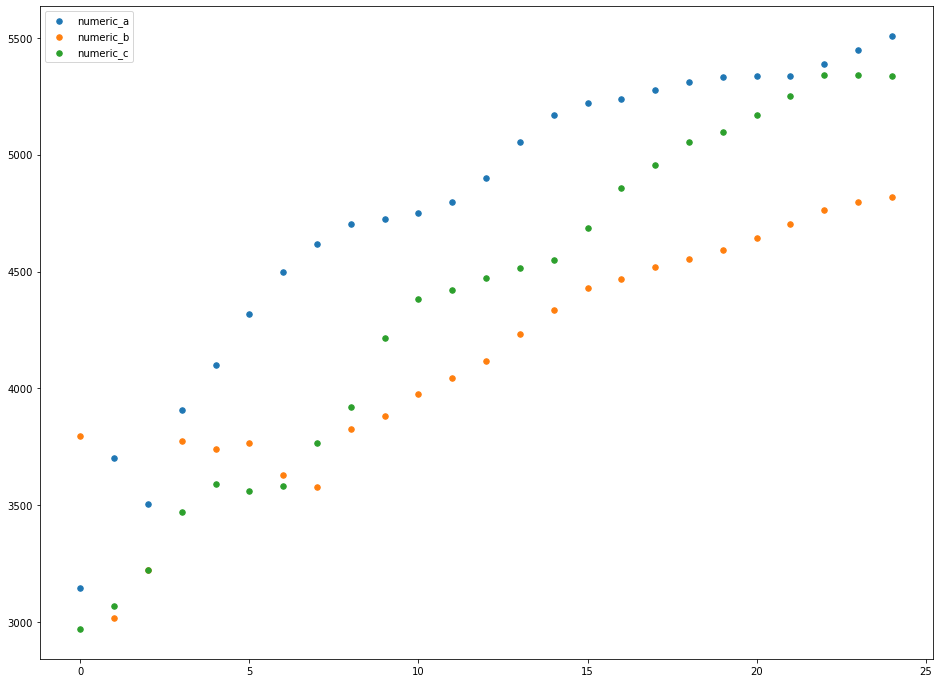

In [305]:
results_k = []
res_df_a = []
res_df_b = []
res_df_c = []
results_list_of_lists = [res_df_a, res_df_b, res_df_c]

for df in range(len(df_n_list)):
    for k in range(1,26):
        x = knn_train_test_v7(df_n_list[df],best_cols_for3_5.index.tolist()[:2],'price', 2, k)
        results_list_of_lists[df].append(x)
        

fig, ax = plt.subplots(figsize=(16,12))
for df in range(len(df_n_list)):
    plt.scatter( x=list(range(len(results_list_of_lists[df]))), y=results_list_of_lists[df] ,label='numeric_a', s=30)
plt.legend(labels=('numeric_a_n','numeric_b_n','numeric_c_n'))
plt.show()

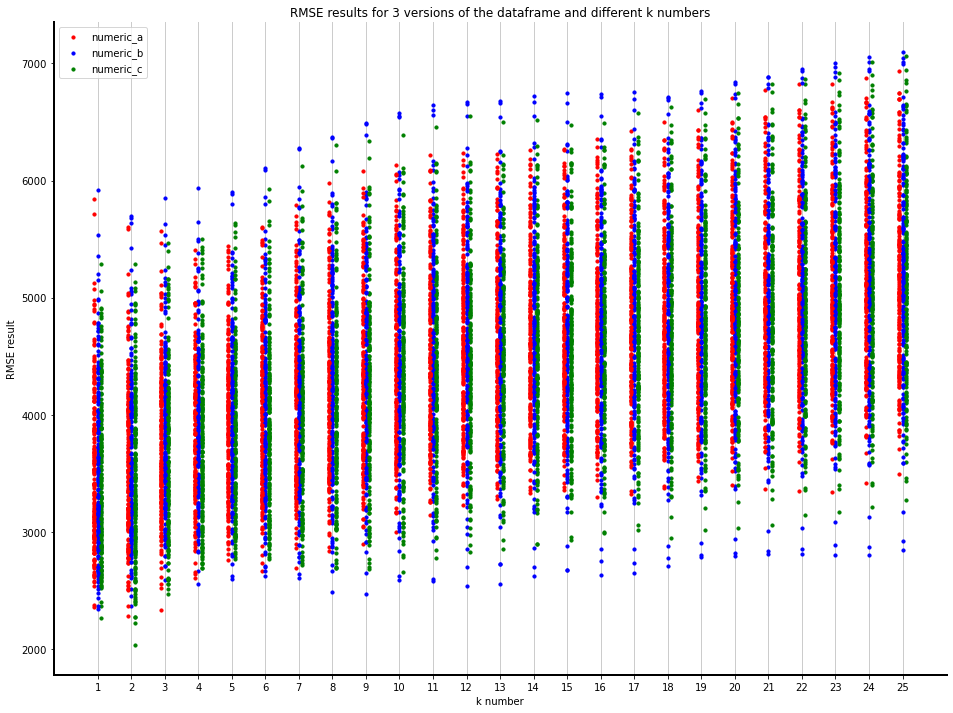

In [881]:
shift_1 = []
for i in list(range(1,26)):
    shift_1.append(i-0.1)
shift_2 = []
for i in list(range(1,26)):
    shift_2.append(i+0.1)

res_df_a = []
res_df_b = []
res_df_c = []
fig, ax = plt.subplots(figsize=(16,12))
for z in range(1,200):
    some_list_a = []
    some_list_b = []
    some_list_c = []
    
    for k in range(1,26):
        x1 = knn_train_test_v7(numeric_a_n,best_cols_list[:2],'price', z, k)
        some_list_a.append(x1)
        x2 = knn_train_test_v7(numeric_b_n,best_cols_list[:2],'price', z, k)
        some_list_b.append(x2)
        x3 = knn_train_test_v7(numeric_c_n,best_cols_list[:2],'price', z, k)
        some_list_c.append(x3)
        
    res_df_a.append(some_list_a)
    res_df_b.append(some_list_b)
    res_df_c.append(some_list_c)
    
    plt.scatter( x=shift_1, y=res_df_a[z-1] ,label='numeric_a', s=10, color='r', zorder=3)
    plt.scatter( x=list(range(1,26)), y=res_df_b[z-1] ,label='numeric_b', s=10, color='b',zorder=3)
    plt.scatter( x=shift_2, y=res_df_c[z-1] ,label='numeric_c', s=10, color='g',zorder=3)
spines(ax)
for i in list(range(1,26)):
    plt.axvline(i, zorder=0, color='black', alpha=0.2 ,linewidth=1)
plt.xlabel('k number')
plt.ylabel('RMSE result')
ax.set_xticks(range(1,26))
# plt.legend()
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[:3], labels[:3], loc=2)
# plt.legend(labels=('numeric_a','numeric_b','numeric_c'))
plt.title('RMSE results for 3 versions of the dataframe and different k numbers')
plt.show()

In [328]:
best_cols_list[:2]

['engine_size', 'width']

In [319]:
# results numeric A
names_list = []
for i in range(len(res_df_a)):
    names_list.append(str(i))
d = {}
for df in range(len(res_df_a)):
    d[names_list[df]] = res_df_a[df]
avg_for_ka = pd.DataFrame(data=d, index=(list(range(1,26))))
avg_for_ka['mean of k'] = avg_for_ka.mean(axis=1)
avg_for_ka['std of k'] = avg_for_ka.iloc[:,:-2].std(axis=1)
avg_for_ka

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,mean of k,std of k
1,3305.363752,3145.397164,2892.909954,3361.647392,3122.901979,3507.259363,3791.355224,2983.955337,3419.601149,2996.680949,...,2738.785172,3006.109909,3045.374953,2926.217731,2938.453869,3452.694006,3113.109787,2464.627646,3268.244213,385.402705
2,3115.414402,3704.569934,2732.526619,2880.477689,3694.859325,4316.162803,4446.897316,2881.379227,2499.687653,3046.371496,...,2877.551126,2708.736779,2728.137965,3004.116299,2837.712797,3405.861608,3111.469271,2585.332846,3161.776765,465.908560
3,3301.917929,3503.992655,2724.437479,2819.625017,3979.654897,4857.920132,4862.108556,2722.696018,2802.028920,3521.704897,...,2886.608285,2850.174940,2881.991926,3225.932720,3001.768521,3429.544657,3137.682477,2902.826887,3275.618956,535.695457
4,3112.073089,3907.667535,2697.673382,2925.301056,4199.151416,4987.520460,4439.566701,3102.358896,2987.830186,3859.986367,...,3040.206627,2969.268085,3284.922399,3236.737861,3086.594107,3283.638437,3128.928193,3103.221442,3384.184208,564.203717
5,3403.177591,4102.126591,2982.458597,2987.929630,4405.219689,5035.469655,4555.568404,3411.592038,3087.691625,3934.274358,...,3091.802680,3103.082132,3558.375519,2954.718874,3152.856890,3135.429332,2956.789778,3175.612736,3473.005197,583.803269
6,3667.368603,4320.059920,2979.522445,3058.300048,4568.225490,5065.976843,4747.655057,3719.976949,3201.384908,3954.918534,...,3316.888333,3176.244689,3484.885551,2667.658266,3117.669560,3220.458455,3023.831715,3126.693334,3575.368633,581.678693
7,3838.341258,4498.715404,3075.230773,3134.566848,4428.854801,5177.394008,4789.286897,3849.480998,3447.619720,4089.496467,...,3383.853936,3363.952803,3576.507728,2636.351092,3325.674049,3407.341062,3278.755284,3324.229944,3714.201445,572.623377
8,4034.361090,4619.138250,3225.593084,3335.665719,4386.109491,5214.417458,4877.028991,3981.339047,3431.865489,4245.047447,...,3444.351894,3257.376837,3890.274978,2718.354099,3434.263907,3508.984791,3504.105873,3566.738196,3831.561438,561.640406
9,4167.070778,4704.463588,3296.806901,3505.821681,4654.692223,5102.488374,4967.126368,4156.224185,3396.165876,4372.356541,...,3314.474943,3389.798688,4018.190270,2863.356791,3562.371855,3617.913859,3596.194599,3743.277945,3921.251565,571.271892
10,4222.293585,4725.950357,3411.495664,3695.736411,4731.871517,5063.083810,5067.517330,4330.944722,3568.116949,4372.305328,...,3362.811032,3571.898937,4100.734455,3012.253206,3612.820841,3661.772780,3721.854821,3804.727218,4001.408456,596.372686


In [317]:
# results numeric B
names_list = []
for i in range(len(res_df_b)):
    names_list.append(str(i))
d = {}
for df in range(len(res_df_b)):
    d[names_list[df]] = res_df_b[df]
avg_for_kb = pd.DataFrame(data=d, index=(list(range(1,26))))
avg_for_kb['mean of k'] = avg_for_kb.mean(axis=1)
avg_for_kb['std of k'] = avg_for_kb.iloc[:,:-1].std(axis=1)
avg_for_kb.sort_values('mean of k')['mean of k'][:5]

2    3340.424612
1    3402.429764
3    3455.425647
4    3535.925131
5    3650.248857
Name: mean of k, dtype: float64

In [316]:
# results numeric C
names_list = []
for i in range(len(res_df_c)):
    names_list.append(str(i))
d = {}
for df in range(len(res_df_c)):
    d[names_list[df]] = res_df_c[df]
avg_for_kc = pd.DataFrame(data=d, index=(list(range(1,26))))
avg_for_kc['mean of k'] = avg_for_kc.mean(axis=1)
avg_for_kc['std of k'] = avg_for_kc.iloc[:,:-1].std(axis=1)
avg_for_kc.sort_values('mean of k')['mean of k'][:5]

2    3151.864847
3    3253.757448
1    3323.940003
4    3411.868405
5    3538.213861
Name: mean of k, dtype: float64

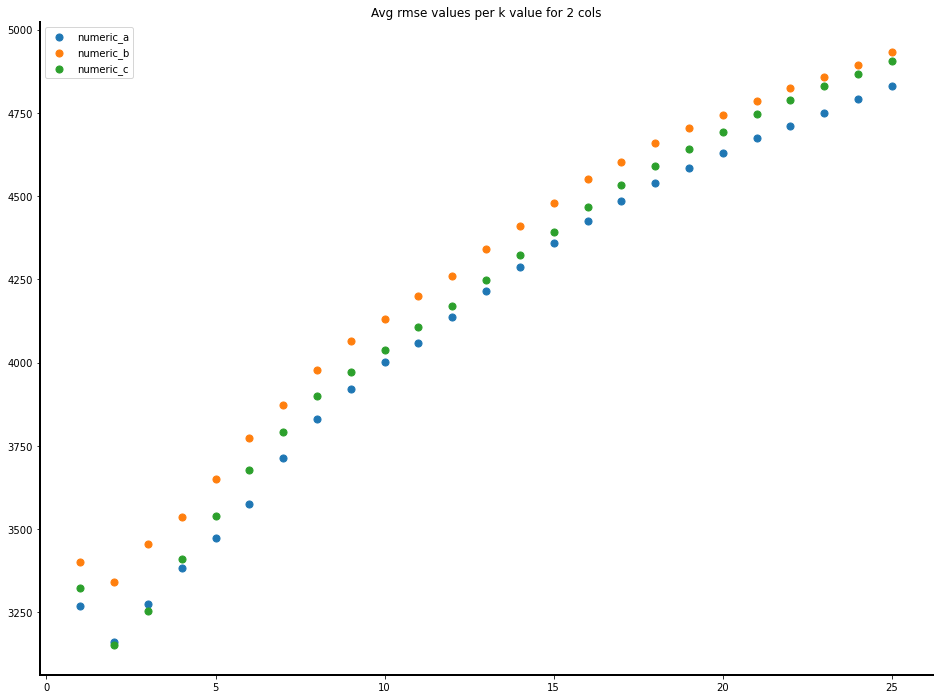

In [325]:
fig, ax = plt.subplots(figsize=(16,12))
plt.scatter( x=avg_for_ka.index, y=avg_for_ka['mean of k'] ,label='numeric_a', s=50)
plt.scatter( x=avg_for_kb.index, y=avg_for_kb['mean of k'] ,label='numeric_b', s=50)
plt.scatter( x=avg_for_kc.index, y=avg_for_kc['mean of k'] ,label='numeric_c', s=50)
spines(ax)
plt.title('Avg rmse values per k value for 2 cols')
plt.legend(labels=('numeric_a','numeric_b','numeric_c'))
plt.show()

# do this wth a function!!!! BELOW

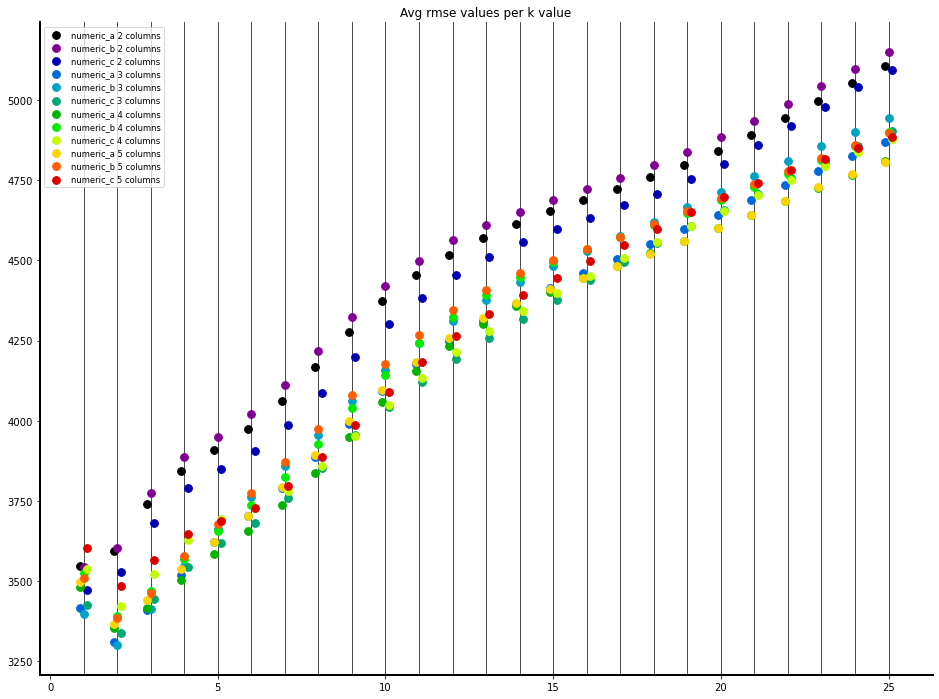

In [564]:
def avg_rmse_per_k(seed,col_number):
    res_df_a = []
    res_df_b = []
    res_df_c = []

    for z in range(1,seed):
        some_list_a = []
        some_list_b = []
        some_list_c = []

        for k in range(1,26):
            x1 = knn_train_test_v7(numeric_a_n,best_cols_list[:col_number],'price', z, k)
            some_list_a.append(x1)
            x2 = knn_train_test_v7(numeric_b_n,best_cols_list[:col_number],'price', z, k)
            some_list_b.append(x2)
            x3 = knn_train_test_v7(numeric_c_n,best_cols_list[:col_number],'price', z, k)
            some_list_c.append(x3)

        res_df_a.append(some_list_a)
        res_df_b.append(some_list_b)
        res_df_c.append(some_list_c)

    names_list = []
    for i in range(len(res_df_a)):
        names_list.append(str(i))
    d = {}
    for df in range(len(res_df_a)):
        d[names_list[df]] = res_df_a[df]
    avg_for_ka = pd.DataFrame(data=d, index=(list(range(1,26))))
    avg_for_ka['mean of k'] = avg_for_ka.mean(axis=1)
    avg_for_ka['std of k'] = avg_for_ka.iloc[:,:-2].std(axis=1)

    names_list = []
    for i in range(len(res_df_b)):
        names_list.append(str(i))
    d = {}
    for df in range(len(res_df_b)):
        d[names_list[df]] = res_df_b[df]
    avg_for_kb = pd.DataFrame(data=d, index=(list(range(1,26))))
    avg_for_kb['mean of k'] = avg_for_kb.mean(axis=1)
    avg_for_kb['std of k'] = avg_for_kb.iloc[:,:-1].std(axis=1)

    names_list = []
    for i in range(len(res_df_c)):
        names_list.append(str(i))
    d = {}
    for df in range(len(res_df_c)):
        d[names_list[df]] = res_df_c[df]
    avg_for_kc = pd.DataFrame(data=d, index=(list(range(1,26))))
    avg_for_kc['mean of k'] = avg_for_kc.mean(axis=1)
    avg_for_kc['std of k'] = avg_for_kc.iloc[:,:-1].std(axis=1)

    avg_frame = pd.DataFrame([avg_for_ka['mean of k'], avg_for_kb['mean of k'],avg_for_kc['mean of k']], index=('numeric_a', 'numeric_b', 'numeric_c'))
    #
    std_frame = pd.DataFrame([avg_for_ka['std of k'], avg_for_kb['std of k'],avg_for_kc['std of k']], index=('numeric_a', 'numeric_b', 'numeric_c'))
    std_frame = std_frame.transpose()
    #
    
    avg_frame = avg_frame.transpose()

    return avg_frame, std_frame

shift_1 = []
for i in list(range(1,26)):
    shift_1.append(i-0.1)
shift_2 = []
for i in list(range(1,26)):
    shift_2.append(i+0.1)

def scatter_man(frame, label):

    plot1 = plt.scatter( x=shift_1, y=frame['numeric_a'] ,label=frame.columns[0]+label, s=60,  zorder=3)
    plot2 = plt.scatter( x=list(range(1,26)), y=frame['numeric_b'] ,label=frame.columns[1]+label, s=60,  zorder=3)
    plot3 = plt.scatter( x=shift_2, y=frame['numeric_c'] ,label=frame.columns[2]+label, s=60,  zorder=3)
    return plot1, plot2, plot3


fig, ax = plt.subplots(figsize=(16,12))
    
df1, dfs1 = avg_rmse_per_k(1000,2)
df2, dfs2 = avg_rmse_per_k(1000,3)
df3, dfs3 = avg_rmse_per_k(1000,4)
df4, dfs4 = avg_rmse_per_k(1000,5)

scatter_man(df1, ' 2 columns')
scatter_man(df2, ' 3 columns')
scatter_man(df3, ' 4 columns')
scatter_man(df4, ' 5 columns')


for i in list(range(1,26)):
    plt.axvline(i, zorder=0, color='black', alpha=0.7 ,linewidth=1)
spines(ax)
plt.title('Avg rmse values per k value')

colormap = plt.cm.nipy_spectral #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
for t,j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])


ax.legend(fontsize='small')
# ax.set_facecolor('#DAF7A6')
# plt.legend()
plt.show()

In [630]:
# dataframe of avg results
step1 = df1.merge(df2, left_index=True, right_index=True, suffixes=(' 2 cols',' 3 cols'))
step2 = step1.merge(df3, left_index=True, right_index=True)
step3 = step2.merge(df4, left_index=True, right_index=True, suffixes=(' 4 cols', ' 5 cols'))
step4 = step3.transpose()
# dataframe of std results
step1s = dfs1.merge(dfs2, left_index=True, right_index=True, suffixes=(' 2 cols',' 3 cols'))
step2s = step1s.merge(dfs3, left_index=True, right_index=True)
step3s = step2s.merge(dfs4, left_index=True, right_index=True, suffixes=(' 4 cols', ' 5 cols'))
step4s = step3s.transpose()

avg_std_results = step4.merge(step4s, left_index=True, right_index=True, suffixes=(' k avg',' k std'))
avg_std_results['best k for avg'] = avg_std_results.loc[:,:'25 k avg'].idxmin(axis=1).str[0]
avg_std_results['best avg result'] = avg_std_results.loc[:,:'25 k avg'].min(axis=1)
avg_std_results['best k for std'] = avg_std_results.loc[:,'1 k std':'25 k std'].idxmin(axis=1).str[0]
avg_std_results['best std result'] = avg_std_results.loc[:,'1 k std':'25 k std'].min(axis=1)
avg_std_results.loc[:,'best k for avg':].sort_values('best avg result')

,best k for avg,best avg result,best k for std,best std result
numeric_b 3 cols,2,3300.684871,1,591.992120
numeric_a 3 cols,2,3311.783066,1,577.699464
numeric_c 3 cols,2,3339.452945,1,632.776286
numeric_a 4 cols,2,3353.334234,1,590.692261
numeric_a 5 cols,2,3365.269080,1,589.547029
numeric_b 5 cols,2,3385.177894,1,599.140152
numeric_b 4 cols,2,3392.925181,1,615.239247
numeric_c 4 cols,2,3421.332481,1,617.798823
numeric_c 2 cols,1,3471.419352,4,623.828373
numeric_c 5 cols,2,3483.536989,1,629.726225


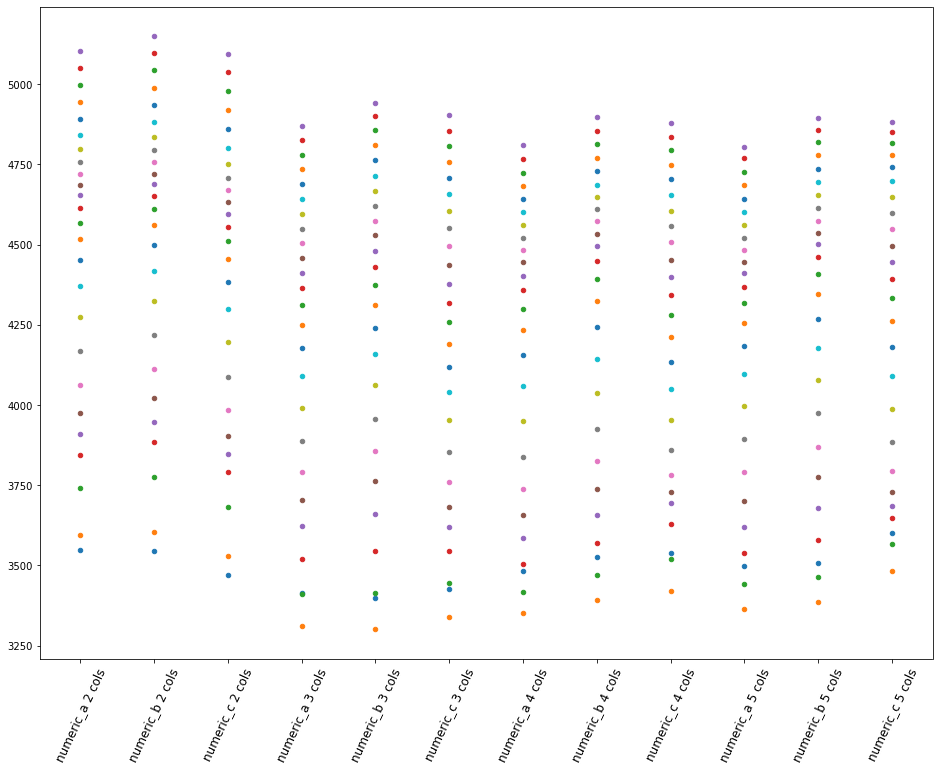

In [921]:
fig, ax = plt.subplots(figsize=(16,12))
for col in step4:
    plt.scatter(x=step4.index, y=step4[col] , s=20)
ax.tick_params(axis = 'x',labelsize=12, rotation=65)

# plt.scatter( x=step3[], y=step3['numeric_a'] ,label=frame.columns[0]+label, s=60,  zorder=3)

In [914]:
step3 aaa

,numeric_a 2 cols,numeric_b 2 cols,numeric_c 2 cols,numeric_a 3 cols,numeric_b 3 cols,numeric_c 3 cols,numeric_a 4 cols,numeric_b 4 cols,numeric_c 4 cols,numeric_a 5 cols,numeric_b 5 cols,numeric_c 5 cols
1,3548.040292,3544.752541,3471.419352,3415.060136,3397.295179,3426.920944,3481.721590,3526.896404,3538.914795,3498.893183,3508.557439,3602.461815
2,3593.539135,3604.174973,3530.076637,3311.783066,3300.684871,3339.452945,3353.334234,3392.925181,3421.332481,3365.269080,3385.177894,3483.536989
3,3741.463847,3774.879351,3682.472747,3410.173193,3414.540412,3444.062284,3417.815699,3469.493798,3521.221423,3442.009410,3463.927680,3565.830340
4,3842.994836,3886.144260,3790.755132,3520.479315,3546.431172,3544.964832,3504.944740,3569.735606,3627.859813,3538.344686,3578.952486,3646.754657
5,3910.041922,3948.052724,3848.251897,3621.666784,3661.168347,3620.227887,3585.816270,3656.483237,3694.784995,3621.067208,3677.720221,3686.747411
6,3975.974050,4021.008704,3905.040673,3703.634940,3763.618920,3682.066670,3656.830990,3738.770896,3729.305103,3702.437293,3776.002014,3727.653317
7,4062.078374,4112.815559,3985.921376,3790.039429,3857.737135,3758.996156,3738.486220,3825.201139,3780.714684,3792.272488,3870.775153,3795.413209
8,4168.244208,4217.048786,4087.978449,3886.963106,3957.220493,3853.884312,3837.886725,3926.189069,3859.591838,3894.179699,3975.389775,3885.647910
9,4275.855599,4324.520233,4197.891562,3991.283809,4062.564527,3954.806378,3949.392655,4038.728177,3953.582489,3998.247310,4079.022181,3986.839391
10,4372.447503,4419.399502,4300.896043,4092.019887,4157.957616,4041.914478,4059.125683,4143.323509,4048.839820,4097.363849,4178.379229,4089.447159


# numeric_b 3 cols k=2 gives us the best avg result 
OR DOES IT?
We used cols from best cols list from single column model results

In [1102]:
top5cols = best_cols_list[1:6]
random.shuffle(top5cols)
res_df_b = []
# col_variants
top_list = []
def avg_rmse_per_col_vars(seed, cols_amount, cols_vars):    
    dict_abc = {}

    res_df_a = []
    res_df_b = []
    res_df_b = []

    fucking_remembera = 5000
    best_besta = 5000
    fucking_rememberb = 5000
    best_bestb = 5000
    fucking_rememberc = 5000
    best_bestc = 5000

    # in the future just put in a factorial here:
    for i in range(0,cols_vars):
        other_col_list = []
        other_col_list.append(best_cols_list[0])
        top5cols = best_cols_list[1:6]
        random.shuffle(top5cols)
    #     res_df_b = []
    #     col_random = np.random.randint(1,6)    
        for el in top5cols[0:(cols_amount-1)]:
            other_col_list.append(el)

        some_list_a = []
        some_list_b = []
        some_list_c = []
        for z in range(0,seed):
            x1 = knn_train_test_v7(numeric_a_n,other_col_list,'price', z, 2)
            x2 = knn_train_test_v7(numeric_b_n,other_col_list,'price', z, 2)
            x3 = knn_train_test_v7(numeric_c_n,other_col_list,'price', z, 2)
            some_list_a.append(x1)
            some_list_b.append(x2)
            some_list_c.append(x3)

            if x1 < best_besta:
                best_besta = x1
            else:
                pass
            if x2 < best_bestb:
                best_bestb = x2
            else:
                pass
            if x3 < best_bestc:
                best_bestc = x3
            else:
                pass
        res_df_a.append(some_list_a)  
        res_df_b.append(some_list_b)
        res_df_c.append(some_list_c)
        if np.mean(some_list_a) < fucking_remembera:
            dict_abc['Best avg A'] = np.mean(some_list_a)
            dict_abc['Best avg A cols'] = other_col_list
        else:
            pass
        if np.mean(some_list_b) < fucking_rememberb:
            dict_abc['Best avg B'] = np.mean(some_list_b)
            dict_abc['Best avg B cols'] = other_col_list
        else:
            pass
        if np.mean(some_list_c) < fucking_rememberc:
            dict_abc['Best avg C'] = np.mean(some_list_c)
            dict_abc['Best avg C cols'] = other_col_list
        else:
            pass   

        top_list.append(res_df_a)
        top_list.append(res_df_b)
        top_list.append(res_df_c)
    return dict_abc
# now lets use that long function:

d2 = avg_rmse_per_col_vars(100, 2, 5) 
df2 = pd.DataFrame.from_dict(d2, orient='index')

d3 = avg_rmse_per_col_vars(100, 3, 10) 
df3 = pd.DataFrame.from_dict(d3, orient='index')

d4 = avg_rmse_per_col_vars(100, 4, 20) 
df4 = pd.DataFrame.from_dict(d4, orient='index')

d5 = avg_rmse_per_col_vars(100, 5, 100) 
df5 = pd.DataFrame.from_dict(d5, orient='index')

d6 = avg_rmse_per_col_vars(100, 6, 100) 
df6 = pd.DataFrame.from_dict(d6, orient='index')

data_frames = [df2, df3, df4, df5,df6]
result_1 = pd.concat(data_frames, join='outer', axis=1)

In [1103]:
result_2 = result_1.copy()
result_2.columns = ['2 cols','3 cols','4 cols','5 cols','6 cols']
result_2v2 = result_2.iloc[::2].astype(float).copy()
result_2v2['best df'] = result_2v2.idxmin(axis=1)
result_2v2

,2 cols,3 cols,4 cols,5 cols,6 cols,best df
Best avg A,3203.147095,3281.332213,3242.438173,3245.083565,3268.736092,2 cols
Best avg B,3248.357876,3348.167525,3303.689263,3336.213893,3372.491404,2 cols
Best avg C,3103.694749,3351.862511,3325.943786,3335.778712,3414.681634,2 cols


In [ ]:
# seed, cols_amount, cols_vars

In [ ]:
avg_rmse_per_col_vars(seed, cols_amount, cols_vars): 

In [933]:
len(top_list)

60

In [932]:
len(res_df_a)

20

In [928]:
dict_abc

{'Best avg A': 3490.7078706132306,
 'Best avg A cols': ['engine_size', 'highway_mpg', 'horsepower', 'width'],
 'Best avg B': 3554.683405476991,
 'Best avg B cols': ['engine_size', 'highway_mpg', 'horsepower', 'width'],
 'Best avg C': 3449.8393302503678,
 'Best avg C cols': ['engine_size', 'highway_mpg', 'horsepower', 'width']}

In [861]:
some_list_b = []
for z in range(0,1000):
    x2 = knn_train_test_v7(numeric_b_n,['engine_size', 'horsepower', 'city_mpg'],'price', z, 2)
    some_list_b.append(x2)
np.mean(some_list_b)
    

3126.3222112477

In [737]:
empty_list = []
for el in res_df_b:
    empty_list.append(np.mean(el))
empty_list

[3333.251628422967, 3246.8998597496675, 3368.1411710960588]

In [261]:
knn_train_test_v8(numeric_a_n, best_cols_list[:5],'price', 2, 2, 4)

2618.6635494469224

In [198]:
def knn_train_test_v8(df, train_cols, target_col, seed, k, fold):
    
    rmse_dict = {} 
    # train and test 
    kf = KFold(fold, shuffle=True, random_state=seed)
    knn = KNeighborsRegressor(n_neighbors=k)
 
    mses = cross_val_score(knn, df[train_cols], df[target_col], scoring='neg_mean_squared_error', cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)

    return avg_rmse

In [ ]:

res_df_a = []
res_df_b = []
res_df_c = []
fig, ax = plt.subplots(figsize=(16,12))
for z in range(1,103):
    some_list_a = []
    some_list_b = []
    some_list_c = []
    
    for k in range(1,26):
        x1 = knn_train_test_v8(numeric_a_n,best_cols_for3_5.index.tolist()[:2],'price', z, k,y)
        some_list_a.append(x1)
        x2 = knn_train_test_v8(numeric_b_n,best_cols_for3_5.index.tolist()[:2],'price', z, k,y)
        some_list_b.append(x2)
        x3 = knn_train_test_v8(numeric_c_n,best_cols_for3_5.index.tolist()[:2],'price', z, k,y)
        some_list_c.append(x3)
        
    res_df_a.append(some_list_a)
    res_df_b.append(some_list_b)
    res_df_c.append(some_list_c)
    
    plt.scatter( x=shift_1, y=res_df_a[z-1] ,label='numeric_a', s=10, color='r')
    plt.scatter( x=list(range(1,26)), y=res_df_b[z-1] ,label='numeric_b', s=10, color='b')
    plt.scatter( x=shift_2, y=res_df_c[z-1] ,label='numeric_c', s=10, color='g')

plt.legend(labels=('numeric_a','numeric_b','numeric_c'))
plt.show()

In [ ]:


# knn = KNeighborsRegressor(algorithm='auto')
# mses = cross_val_score(knn, train_set[train_cols], test_set[train_cols], scoring='neg_mean_squared_error', cv=kf)
# rmses = np.sqrt(np.absolute(mses))
# avg_rmse = np.mean(rmses)